In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
trajectory_data = pd.read_csv("gopher_S1_R3_V1_10NPs_traj.csv")
pd.options.display.max_columns = 20
pd.options.display.max_rows = 10
pd.options.display.notebook_repr_html = True
x = np.asarray(trajectory_data[trajectory_data["Trajectory"] == 1]["x"])
y = np.asarray(trajectory_data[trajectory_data["Trajectory"] == 1]["y"])
t = np.asarray(trajectory_data[trajectory_data["Trajectory"] == 1]["Frame"])
#print(x)
#print(y)
#print(t)

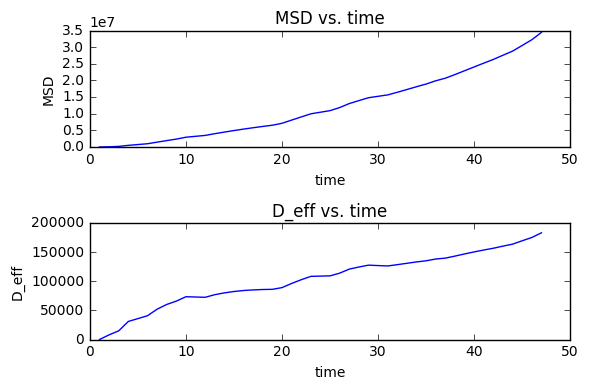

In [3]:
# Multiple Particles
def Deff_calc(x,y,t):
    #row_ct = x.shape[0]
    #col_ct = x.shape[1]
    #N = x.shape[0]
    N = 1
    #SD = np.zeros((row_ct,col_ct-1))
    SD = np.zeros(len(x)-1)
    #MSD = np.zeros((row_ct,col_ct-1))
    MSD = np.zeros(len(x)-1)
    #D_eff = np.zeros((row_ct,col_ct-1))
    D_eff = np.zeros(len(x)-1)
    q = 1
    while q <= N:
        i = 1
        while i <= len(x)-1:
            SD[i-1] = (abs(x[0]-x[i]) ** 2 + abs(y[0]-y[i]) ** 2)
            total_SD = 0
            p = i
            while p >= 1:
                total_SD = total_SD + SD[p-1]
                p -= 1
            MSD[i-1] = total_SD
            D_eff[i-1] = MSD[i-1]/4/t[i]
            i += 1
        q += 1
    #print(SD)
    #print(MSD)
    #print(D_eff)
    plt.figure(1)
    plt.subplot(211)
    plt.xlabel("time")
    plt.ylabel("MSD")
    plt.title("MSD vs. time")
    plt.plot(t[1:len(t)],MSD)
    plt.tight_layout()
    #plt.show()
    
    plt.subplot(212)
    plt.xlabel("time")
    plt.ylabel("D_eff")
    plt.title("D_eff vs. time")
    plt.plot(t[1:len(t)],D_eff)
    plt.tight_layout()
    plt.show()
Deff_calc(x,y,t)
#Deff_calc(np.array([[0,-3.00,-0.5,-3.00,2.00,-2.50,2.50],[3,-2.5,6,-2,-4,-1,2],[-2,-4,-6,-1,3,1,0]]), np.array([[0,2.50,3.50,-4.0,0.00,-0.50,2.50],[2,5,4,6,-2,-1,0],[-2,-5,-7,-1,1,-3,-1]]), np.array([0,1,2,3,4,5,6]))